In [79]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import TimeSeriesSplit


In [80]:
cstr = pd.read_csv("training_data_set.csv")

In [81]:
cstr.head(5)

,volume,reactor_diameter,liquid_height,bottom_depth,n_impeller,diameter_impeller_1,ax_pos_impeller_1,n_blades_1,pitch_angle_1,diameter_impeller_2,...,ax_pos_impeller_3,n_blades_3,pitch_angle_3,n_diptubes,n_baffles,rpm,strainRate_p50,epsilon_p50,k_p50,Umag_p50
0,0.223838,0.1,0.015167,0.02,1,0.035,-0.014,2,0,0.00,...,0,0,0,0,4,1000,35.991812,0.040620,0.004243,0.219517
1,0.537212,0.1,0.055067,0.02,2,0.035,-0.014,2,0,0.05,...,0,0,0,0,4,1000,50.097474,0.473682,0.031069,0.352871
2,0.805819,0.1,0.089267,0.02,2,0.035,-0.014,2,0,0.05,...,0,0,0,0,4,1000,40.765123,0.469849,0.033162,0.299601
3,0.223838,0.1,0.015167,0.02,1,0.035,-0.014,2,0,0.00,...,0,0,0,0,4,250,7.227823,0.000414,0.000177,0.048872
4,0.223838,0.1,0.015167,0.02,1,0.035,-0.014,2,0,0.00,...,0,0,0,0,4,500,16.879798,0.005030,0.001135,0.105326


In [108]:
cstr.drop(columns=["ax_pos_impeller_1", "pitch_angle_1", "n_blades_3", "pitch_angle_3", "n_diptubes"], inplace=True, errors='ignore')


# Display the modified DataFrame
cstr

,volume,reactor_diameter,liquid_height,bottom_depth,n_impeller,diameter_impeller_1,n_blades_1,diameter_impeller_2,ax_pos_impeller_2,n_blades_2,pitch_angle_2,diameter_impeller_3,ax_pos_impeller_3,n_baffles,rpm,strainRate_p50,epsilon_p50,k_p50,Umag_p50
0,0.223838,0.1,0.015167,0.02,1,0.035,2,0.00,0.00,0,0,0,0,4,1000,35.991812,0.040620,0.004243,0.219517
1,0.537212,0.1,0.055067,0.02,2,0.035,2,0.05,0.04,4,45,0,0,4,1000,50.097474,0.473682,0.031069,0.352871
2,0.805819,0.1,0.089267,0.02,2,0.035,2,0.05,0.04,4,45,0,0,4,1000,40.765123,0.469849,0.033162,0.299601
3,0.223838,0.1,0.015167,0.02,1,0.035,2,0.00,0.00,0,0,0,0,4,250,7.227823,0.000414,0.000177,0.048872
4,0.223838,0.1,0.015167,0.02,1,0.035,2,0.00,0.00,0,0,0,0,4,500,16.879798,0.005030,0.001135,0.105326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1790.707813,2.0,0.303333,0.40,1,0.700,2,0.00,0.00,0,0,0,0,4,136,4.855197,0.056416,0.042717,0.602148
764,4297.698750,2.0,1.101333,0.40,2,0.700,2,1.00,0.80,2,60,0,0,4,68,2.568936,0.026782,0.037753,0.398971
765,4297.698750,2.0,1.101333,0.40,2,0.700,2,1.00,0.80,2,60,0,0,4,136,5.155067,0.217139,0.152178,0.802404
766,1790.707813,2.0,0.303333,0.40,1,0.700,2,0.00,0.00,0,0,0,0,4,68,2.423275,0.007009,0.010518,0.300822


# EDA

In [109]:
cstr.describe()

,volume,reactor_diameter,liquid_height,bottom_depth,n_impeller,diameter_impeller_1,n_blades_1,diameter_impeller_2,ax_pos_impeller_2,n_blades_2,pitch_angle_2,diameter_impeller_3,ax_pos_impeller_3,n_baffles,rpm,strainRate_p50,epsilon_p50,k_p50,Umag_p50
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.000000,768.000000,768.00000,768.000000,768.0,768.0,768.0,768.000000,768.000000,768.000000,768.000000,768.000000
mean,795.733001,0.733594,0.390027,0.146719,1.666667,0.256758,2.0,0.244531,0.195000,1.96875,35.156250,0.0,0.0,4.0,269.843750,9.851273,0.084488,0.030871,0.288491
std,1543.259746,0.640464,0.450524,0.128093,0.471712,0.224163,0.0,0.313532,0.251138,1.54517,25.618331,0.0,0.0,0.0,219.920044,8.258805,0.125118,0.045684,0.179364
min,0.223838,0.100000,0.015167,0.020000,1.000000,0.035000,2.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,4.0,34.000000,0.912730,0.000414,0.000177,0.048872
25%,4.297699,0.200000,0.082600,0.040000,1.000000,0.070000,2.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,4.0,108.000000,3.938278,0.005652,0.004070,0.149742
50%,34.381590,0.400000,0.197167,0.080000,2.000000,0.140000,2.0,0.100000,0.080000,2.00000,45.000000,0.0,0.0,4.0,195.000000,6.966812,0.031051,0.013096,0.251349
75%,805.818516,1.075000,0.550667,0.215000,2.000000,0.376250,2.0,0.380000,0.304000,3.00000,60.000000,0.0,0.0,4.0,382.000000,13.711159,0.105256,0.037604,0.380422
max,6446.548125,2.000000,1.785333,0.400000,2.000000,0.700000,2.0,1.000000,0.800000,4.00000,60.000000,0.0,0.0,4.0,1000.000000,50.097474,0.732460,0.310788,1.006092


In [119]:
cstr1 = cstr.dropna().reset_index(drop=True) 
cstr1.isnull()

,volume,reactor_diameter,liquid_height,bottom_depth,n_impeller,diameter_impeller_1,n_blades_1,diameter_impeller_2,ax_pos_impeller_2,n_blades_2,pitch_angle_2,diameter_impeller_3,ax_pos_impeller_3,n_baffles,rpm,strainRate_p50,epsilon_p50,k_p50,Umag_p50
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


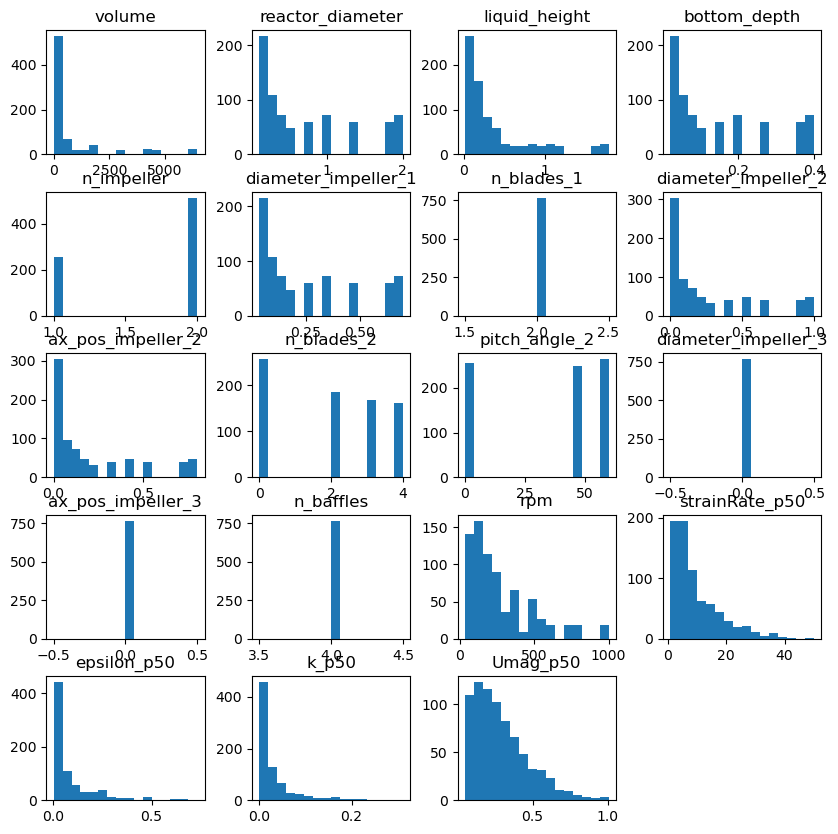

In [114]:
axes = cstr.hist(figsize=(10,10), bins=16)
for ax in axes.flatten():
    ax.grid(False)
plt.show()

# Defination of feactures and Speration of Variable 
- epsilon_p50: Represents the turbulent dissipation rate, indicating the rate at which turbulence kinetic energy is converted into thermal energy.
- k_p50: Denotes turbulent kinetic energy, a measure of the energy contained in turbulence per unit mass.
- strainRate_p50: Refers to the strain rate, describing the rate of deformation in the fluid flow.
- Umag_p50: Signifies the velocity magnitude, representing the speed of fluid particles.

In [123]:
Process_variables  = {'epsilon_p50':'Turbulent Dissipation Rate','k_p50':'Turbulent Kinetic Energy','strainRate_p50':'Strain Rate','Umag_p50':'Velocity Magnitude'}

cstr1.head(5)

features=cstr1.keys()[0:-4]
responses = cstr1.keys()[-4:]

# Data Preprocessing  and Data spliting
  we are creating a storage dictionary for train-test data
 - Splits data into training (70%) and testing (30%) sets.
 - Uses train_test_split() from sklearn.model_selection.

In [84]:
fields = {'epsilon_p50':'Turbulent Dissipation Rate','k_p50':'Turbulent Kinetic Energy','strainRate_p50':'Strain Rate','Umag_p50':'Velocity Magnitude'}


features=cstr.keys()[0:-4]
responses = cstr.keys()[-4:]

train_data_fields = {'epsilon_p50':{'X_train':0,'X_test':0,'y_train':0,'y_test':0},
              'k_p50':{'X_train':0,'X_test':0,'y_train':0,'y_test':0},
              'Umag_p50':{'X_train':0,'X_test':0,'y_train':0,'y_test':0},
              'strainRate_p50':{'X_train':0,'X_test':0,'y_train':0,'y_test':0}}

for field in list(fields.keys()):
    X_train, X_test, y_train, y_test = train_test_split(cstr[features], cstr[field], test_size=0.3, random_state=42)
    train_data = {'X_train':X_train,'X_test':X_test,'y_train':y_train,'y_test':y_test}
    for train_set in list(train_data_fields[field].keys()):
        train_data_fields[field][train_set]=train_data[train_set]

# Model Essembels 

In [85]:
#### Choose Best model and Prediction on Test Data
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import pickle
# sc = StandardScaler()
crossVal = 5
n_estimators=10
forest_reg0 = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
forest_reg1 = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
forest_reg2 = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
forest_reg3 = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

pipeline_forest_epsilon= Pipeline([("estimator", forest_reg0)])
pipeline_forest_k= Pipeline([("estimator", forest_reg1)])
pipeline_forest_Umag= Pipeline([("estimator", forest_reg2)])
pipeline_forest_strainRate= Pipeline([("estimator", forest_reg3)])

models_fields = {'epsilon_p50':{'model':0,'y_predicted':0,'MAE':0,'MSE':0,'RMSE':0,'Explained Var Score': 0},
                  'k_p50':{'model':0,'y_predicted':0,'MAE':0,'MSE':0,'RMSE':0,'Explained Var Score': 0},
                   'Umag_p50':{'model':0,'y_predicted':0,'MAE':0,'MSE':0,'RMSE':0,'Explained Var Score': 0},
                    'strainRate_p50':{'model':0,'y_predicted':0,'MAE':0,'MSE':0,'RMSE':0,'Explained Var Score': 0}}


model_epsilon = pipeline_forest_epsilon.fit(train_data_fields['epsilon_p50']['X_train'],train_data_fields['epsilon_p50']['y_train'])
models_fields['epsilon_p50']['model']= model_epsilon
y_predicted_epsilon = pipeline_forest_epsilon.predict(train_data_fields['epsilon_p50']['X_test'])
models_fields['epsilon_p50']['y_predicted'] = y_predicted_epsilon
    
model_k = pipeline_forest_k.fit(train_data_fields['k_p50']['X_train'],train_data_fields['k_p50']['y_train'])
models_fields['k_p50']['model']= model_k
y_predicted_k = pipeline_forest_k.predict(train_data_fields['k_p50']['X_test'])
models_fields['k_p50']['y_predicted'] = y_predicted_k
    
model_strainRate = pipeline_forest_strainRate.fit(train_data_fields['strainRate_p50']['X_train'],train_data_fields['strainRate_p50']['y_train'])
models_fields['strainRate_p50']['model']= model_strainRate
y_predicted_strainRate = pipeline_forest_strainRate.predict(train_data_fields['strainRate_p50']['X_test'])
models_fields['strainRate_p50']['y_predicted'] = y_predicted_strainRate
    
model_Umag = pipeline_forest_Umag.fit(train_data_fields['Umag_p50']['X_train'],train_data_fields['Umag_p50']['y_train'])
models_fields['Umag_p50']['model']= model_Umag
y_predicted_Umag = pipeline_forest_Umag.predict(train_data_fields['Umag_p50']['X_test'])
models_fields['Umag_p50']['y_predicted'] = y_predicted_Umag

for field in list(fields.keys()):
    models_fields[field]['MAE']=str(round(metrics.mean_absolute_error(train_data_fields[field]['y_test'], models_fields[field]['y_predicted']),5))
    models_fields[field]['MSE']=str(round(metrics.mean_squared_error(train_data_fields[field]['y_test'], models_fields[field]['y_predicted']),5))
    models_fields[field]['RMSE']=str(round(np.sqrt(metrics.mean_squared_error(train_data_fields[field]['y_test'], models_fields[field]['y_predicted'])),5))
    models_fields[field]['Explained Var Score']=str(round(metrics.explained_variance_score(train_data_fields[field]['y_test'], models_fields[field]['y_predicted']),5))   

In [86]:
metrics = ['MAE','MSE','RMSE', 'Explained Var Score']


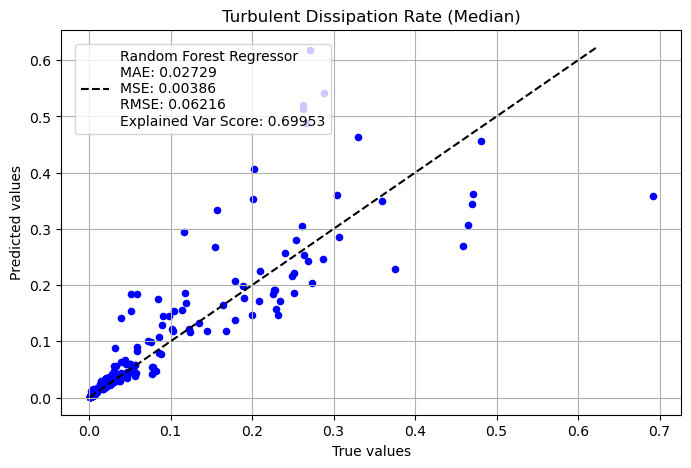

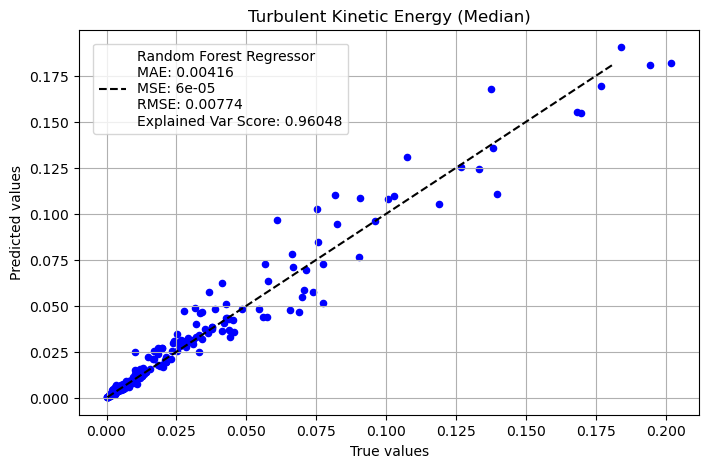

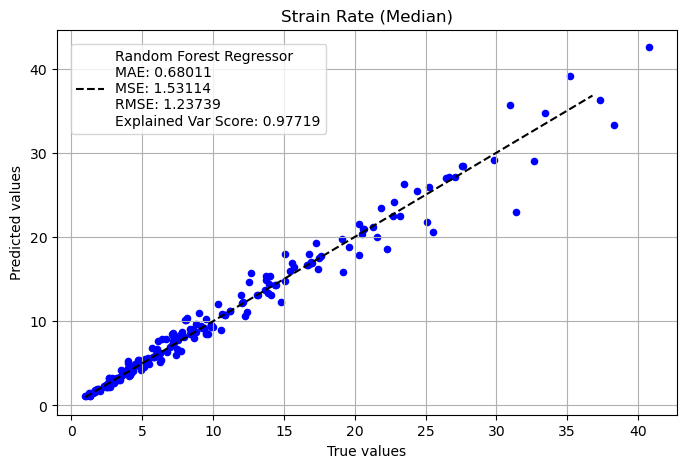

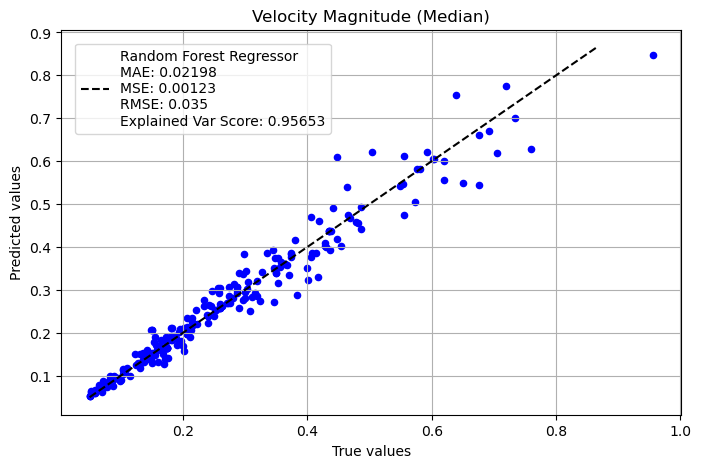

In [97]:

"""#### Plot test data"""

metrics = ['MAE','MSE','RMSE', 'Explained Var Score']


for field in list(fields.keys()):
    plt.subplots(figsize=[8,5])
    perfect_line = np.arange(min(train_data_fields[field]['y_test']), max(train_data_fields[field]['y_test']),(max(train_data_fields[field]['y_test'])-min(train_data_fields[field]['y_test']))/10)
    plt.plot(perfect_line,perfect_line,linestyle="--", color = "black")
    plt.scatter(train_data_fields[field]['y_test'],models_fields[field]['y_predicted'],s=20,color = "blue")
    plt.title( fields[field] + " (Median)" )
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.legend(labels=["Random Forest Regressor \n" + metrics[0] + ": " + models_fields[field]['MAE'] + 
                                                        "\n" + metrics[1] + ": " + models_fields[field]['MSE'] + 
                                                        "\n" + metrics[2] + ": " + models_fields[field]['RMSE'] + 
                                                        "\n" + metrics[3] + ": " + models_fields[field]['Explained Var Score'] ],loc='upper left', borderaxespad=1)
    plt.grid(True)

# **Discussion of the Predicted Result
**Turbulent Dissipation Rate (TDR) (First Plot)**

MAE: 0.02729, MSE: 0.00386, RMSE: 0.06216, Explained Variance Score: 0.69953
The prediction quality is moderate. There is noticeable scatter around the diagonal, indicating some errors in high-value predictions. A lower explained variance score (0.70) suggests the model struggles to capture all variations.

**Turbulent Kinetic Energy (TKE) (Second Plot)**


MAE: 0.00416, MSE: 6e-05, RMSE: 0.00774, Explained Variance Score: 0.96048
This model has excellent predictive accuracy, with a high explained variance score (0.96). Most predictions align closely with actual values. This suggests that TKE is well-correlated with the input variables used in the model.
Strain Rate (SR) (Third Plot)

**Strain rate (SR) (Third Plot)**

MAE: 0.68011, MSE: 1.53114, RMSE: 1.23739, Explained Variance Score: 0.97719
The model performs very well, with most predictions closely matching true values. The high explained variance (0.98) suggests that strain rate is highly predictable using the input features.
Interpretation from a Process Scale-up Perspective

TKE and Strain Rate predictions are highly accurate, meaning the model can reliably estimate turbulence and mixing behavior in scaled-up processes. This is useful for predicting shear forces and blending efficiency.
TDR predictions are less accurate, which could be due to the complexity of energy dissipation in larger-scale systems. More sophisticated modeling approaches (e.g., deep learning or hybrid physics-informed ML) or additional features may be needed to improve accuracy.
Scaling Challenges: If the model is trained on lab-scale or pilot data, deviations in TDR could indicate scale-dependent turbulence behaviors that aren’t fully captured in the dataset.